## Artificial Intelligence Assignment 2
## No7. Neural Network 4
## 20132651 Sungjae Lee

In [1]:
import torch

In [2]:
 class TwoLayerNet(torch.nn.Module):
        def __init__(self, D_in, H, D_out):
            super(TwoLayerNet, self).__init__()
            self.linear1 = torch.nn.Linear(D_in, H)
            self.linear2 = torch.nn.Linear(H, D_out)
            
        def forward(self, x):
            h_relu = self.linear1(x).clamp(min = 0)
            y_pred = self.linear2(h_relu)
            return y_pred
        
# 두 개의 레이어를 갖는, Two Layer Net 을 구현하기 위한 하나의 클래스를 생성합니다.
# 생성시에 D_in, H, D_out 을 입력받아 생성하게 되며, 
# torch 의 Linear 함수를 사용하여 weight 를 구성하게 됩니다.
# 또한 forward 함수를 내장하여 predict 값을 반환하기도 합니다.

In [3]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 위의 코드와 동일한 설정입니다.

In [4]:
model = TwoLayerNet(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = 10e-6)
loss_list = []

# TwoLayerNet 의 init 을 활용하여 model 을 생성합니다
# torch 의 stochastic gradient descent 를 이용한 optimizer 를 구성합니다
# 이 때, lr (learning rate) 는 앞의 코드에서보다 작아진 1e - 04 값으로 진행합니다

In [5]:
for t in range(500):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)
    
    print(t, loss.item())
    loss_list.append(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 1.0911839008331299
1 1.091171145439148
2 1.0911582708358765
3 1.0911455154418945
4 1.0911327600479126
5 1.0911198854446411
6 1.0911071300506592
7 1.0910942554473877
8 1.0910815000534058
9 1.0910686254501343
10 1.0910558700561523
11 1.0910431146621704
12 1.091030240058899
13 1.091017484664917
14 1.0910046100616455
15 1.0909918546676636
16 1.0909790992736816
17 1.0909662246704102
18 1.0909534692764282
19 1.0909407138824463
20 1.0909278392791748
21 1.0909150838851929
22 1.0909022092819214
23 1.0908894538879395
24 1.090876579284668
25 1.090863823890686
26 1.090851068496704
27 1.0908381938934326
28 1.0908254384994507
29 1.0908126831054688
30 1.0907998085021973
31 1.0907870531082153
32 1.0907741785049438
33 1.090761423110962
34 1.09074866771698
35 1.0907357931137085
36 1.0907230377197266
37 1.0907102823257446
38 1.0906974077224731
39 1.0906846523284912
40 1.0906718969345093
41 1.0906590223312378
42 1.0906462669372559
43 1.090633511543274
44 1.0906206369400024
45 1.0906078815460205
46 1.090

370 1.0864614248275757
371 1.0864486694335938
372 1.0864360332489014
373 1.0864232778549194
374 1.0864105224609375
375 1.0863978862762451
376 1.0863851308822632
377 1.0863723754882812
378 1.0863596200942993
379 1.086346983909607
380 1.086334228515625
381 1.086321473121643
382 1.0863088369369507
383 1.0862960815429688
384 1.0862833261489868
385 1.0862706899642944
386 1.0862579345703125
387 1.0862451791763306
388 1.0862325429916382
389 1.0862197875976562
390 1.0862070322036743
391 1.0861942768096924
392 1.086181640625
393 1.086168885231018
394 1.0861562490463257
395 1.0861434936523438
396 1.0861307382583618
397 1.0861181020736694
398 1.0861053466796875
399 1.0860925912857056
400 1.0860799551010132
401 1.0860671997070312
402 1.0860544443130493
403 1.086041808128357
404 1.086029052734375
405 1.086016297340393
406 1.0860036611557007
407 1.0859909057617188
408 1.0859782695770264
409 1.0859655141830444
410 1.0859527587890625
411 1.0859401226043701
412 1.0859273672103882
413 1.0859146118164062

### (1) y_pred에 따른 loss (accuracy) 변화를 화면 출력 확인 (plot)

In [6]:
import matplotlib.pyplot as plt

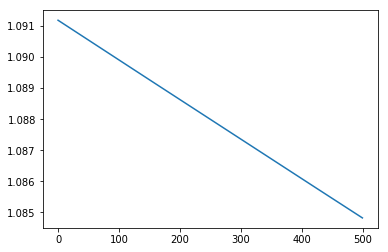

In [7]:
plt.plot(loss_list)
plt.show()

# loss 가 1.03 부터 0.98 까지 linear 하게 감소하는 모습을 볼 수 있습니다.

### (2) 앞 문제의 코드와 비교

In [8]:
# 앞 문제에서 loss 가 발산하는 문제를 겪었는데, 이번에는 learning rate 가 너무 작아
# 최적화된 값에 수렴하지 못하는 모습을 보이고 있습니다.
# 이를 해결하기 위해 learning rate 를 약간 더 큰 값으로 설정할 필요가 있습니다.

# 뿐만 아니라 Two Layer Net 이라는 클래스를 활용하여 손쉽게 2층 신경망을 생성하는 점 또한
# 앞의 코드와 큰 차이점이라고 볼 수 있습니다.